# Model creation
Doing different classification for model?

## Installations, imports, loading packages

In [10]:
!pip install spacy scikit-learn joblib datasets --quiet
!python -m spacy download en_core_web_sm --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
# Standard Libraries
import os
import json
import joblib
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# spaCy for Natural Language Processing
import spacy

# Scikit-learn for machine learning pipeline, vectorization, and modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# NLP model
nlp = spacy.load("en_core_web_sm")

## Loading dataset + separation with minor exploration

In [11]:
kanakmi = load_dataset("Kanakmi/mental-disorders")

Repo card metadata block was not found. Setting CardData to empty.


In [13]:
kanakmi_train = pd.DataFrame(kanakmi['train'])
kanakmi_test = pd.DataFrame(kanakmi['test'])
kanakmi_val = pd.DataFrame(kanakmi['val'])

In [14]:
kanakmi_train.dropna()
kanakmi_test.dropna()
kanakmi_val.dropna()

,text,label
0,I feel anxious constantly. There quite literal...,3
1,I've seen it listed as an off-label use treatm...,0
2,Recently when I fall asleep I wake up startled...,3
3,"Hi, I was diagnosed with a GAD years ago but n...",3
4,"i’ve stopped caring, my grades went from. A’s ...",2
...,...,...
92971,I screwed myself so many times this year (Unab...,1
92972,"I'm home from school until February. No job, a...",0
92973,"I struggle with ptsd, adhd, social anxiety and...",5
92974,I’ve had moderate depression all my life and t...,2


## Labeling of mental disorders from the dataset

In [15]:
# Creating labels + applying labeling to data
label_mapping = {0: 'BPD', 1: 'Bipolar', 2: 'Depression', 3: 'Anxiety', 4: 'Schizophrenia', 5: 'Other'}

kanakmi_train['label'] = kanakmi_train['label'].map(label_mapping)
kanakmi_test['label'] = kanakmi_test['label'].map(label_mapping)
kanakmi_val['label'] = kanakmi_val['label'].map(label_mapping)

In [16]:
# Separating data
X_train, y_train = kanakmi_train['text'], kanakmi_train['label']
X_val, y_val = kanakmi_val['text'], kanakmi_val['label']
X_test, y_test = kanakmi_test['text'], kanakmi_test['label']

## Training model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english', max_features=5000),
    LogisticRegression(max_iter=1000)  # Replace with another model if needed -> LogisticRegression(max_iter=1000)
)

In [19]:
# Train the model using training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('logisticregression', LogisticRegression(max_iter=1000))])

## Classification/accuracy

In [20]:
# Validate on validation set
y_val_pred = pipeline.predict(X_val)

In [21]:
# Evaluate on validation set
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Accuracy Score: ", accuracy_score(y_val, y_val_pred))

# If validation looks good, evaluate on the test set
y_test_pred = pipeline.predict(X_test)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
print("Test Accuracy Score: ", accuracy_score(y_test, y_test_pred))

Validation Classification Report:
                precision    recall  f1-score   support

      Anxiety       0.80      0.84      0.82     25839
          BPD       0.78      0.83      0.81     34082
      Bipolar       0.75      0.55      0.63      5716
   Depression       0.66      0.74      0.70     19343
        Other       0.50      0.22      0.31      6111
Schizophrenia       0.68      0.39      0.49      1885

     accuracy                           0.75     92976
    macro avg       0.70      0.59      0.63     92976
 weighted avg       0.74      0.75      0.74     92976

Validation Accuracy Score:  0.7489674754775426
Test Classification Report:
                precision    recall  f1-score   support

      Anxiety       0.81      0.83      0.82      6440
          BPD       0.78      0.84      0.81      8472
      Bipolar       0.75      0.54      0.63      1405
   Depression       0.67      0.75      0.71      4877
        Other       0.52      0.23      0.32      1529
Schiz

The validation accuracy is ~0.75, and accuracy score is ~0.75; better than 0.42

In [24]:
joblib.dump(pipeline, 'mental_health_classifier.joblib')

['mental_health_classifier.joblib']

## Testing it on the text

In [25]:
predict_text = ["My grandkids never visit anymore, and I feel very alone. It's always dark in my house and the only sounds coming from it are me."]
predicted_label = pipeline.predict(predict_text)

print(f"Predicted Label: {predicted_label[0]}")

Predicted Label: Depression


## Confusion Matrix

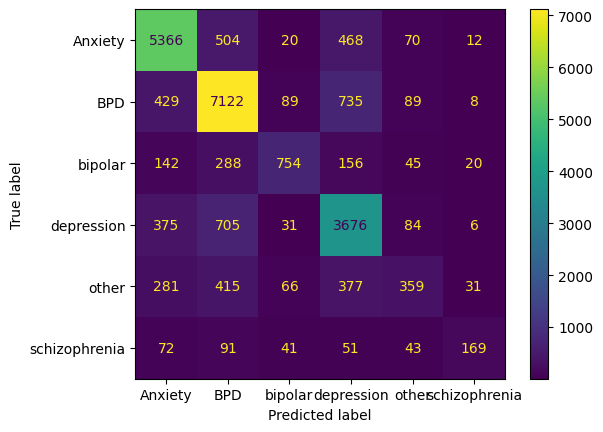

In [ ]:
# Confusion matrix for test set
ConfusionMatrixDisplay.from_estimator(pipeline, X_test, y_test)
plt.show()